In [1]:
%run "..\src\utils\notebook_style.ipynb"

# Zuggurtmodell

## Verbundschubspannungs-Schlupfbeziehung

Die Verbundschuspannungs-Schlupfbeziehung wird in @Spathelf2022 foglendermassen postuliert:
Es wird hier auf die Stahlspannung sich bezogen, nicht auf den Schlupf

In [2]:
sigma_s, f_cc, f_sy = sp.symbols('sigma_s f_cc f_sy')
tau_b = sp.Function('tau_b')(sigma_s)

In [3]:
eq_tau_b = Eqn(tau_b,sp.Piecewise((0, sigma_s<=0),(0.6*f_cc **(sp.Rational(2,3)), sigma_s<=f_sy), (0.3*f_cc**(sp.Rational(2,3)), sigma_s >f_sy)))
eq_tau_b_lambd = sp.lambdify((sigma_s, f_sy, f_cc), eq_tau_b.rhs)


eq_tau_b

Equation(tau_b(sigma_s), Piecewise((0, sigma_s <= 0), (0.6*f_cc**(2/3), f_sy >
= sigma_s), (0.3*f_cc**(2/3), True)))

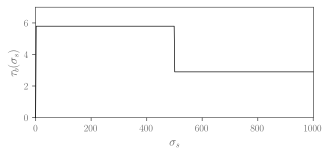

In [4]:
#| label: fig-zg-verbundschubbez
#| fig-cap: Verbundschubspannung als Funktion der Betonstahlspannung

f_sy_num = 500

sigma_s_array = np.linspace(0,f_sy_num*2,500)
tau_b_array = eq_tau_b_lambd(sigma_s_array, f_sy_num, 30)

plt.plot(sigma_s_array, tau_b_array, color='black', linewidth=0.7)
plt.ylim(0,7)
plt.xlim(0, max(sigma_s_array))
plt.xlabel(f'${sp.latex(sigma_s)}$')
plt.ylabel(f'${sp.latex(tau_b)}$')
plt.show()

## Ziel der Betrachtung

Das Ziel ist es ein Momenten-Krümmungsdiagramm zu erstellen, welches auf dem Zuggurtmodell basiert. Unter Eingabe der Biegemomente aus einem FEM-Modell resultieren daraus die Krümmungen.